Link to Video: [link](https://www.youtube.com/watch?v=Nc9p2zdpO8I)

### Introduction

Alzheimer's disease is a progressive neurodegenerative disorder that primarily affects memory, thinking, and behavior, eventually leading to severe cognitive decline and loss of independence. While research has identified risk factors, exact root causes still remain an area of active study.

This study utilizes the Alzheimer's Prediction Dataset (Global). The dataset consists of a single table containing information on 74,283 elderly individuals from 20 different countries across all continents except Antarctica. The participants range in age from 50 to their late 90s.Each individual is described using 25 different categories, which include both quantitative and qualitative data.

This rich dataset will be used to explore potential factors influencing an individual's likelihood of an Alzheimer's diagnosis, aiming to provide deeper insights into the disease's contributing elements.



By: Ken Muangsiri & Keerthi Maddipatla

### **Question 1:**
#### **How do age, education level, and lifestyle factors (such as physical activity, BMI, smoking, alcohol consumption) affect the chance of developing Alzheimer's?**

**Hypothesis:**
- Alzheimer’s disease is commonly associated with memory loss in the elderly, suggesting that age may be a strong predictor of its emergence. Given that the risk of neurodegenerative diseases generally increases with age, we expect to observe a positive correlation between age and the likelihood of an Alzheimer’s diagnosis.
- Additionally, lifestyle factors such as engagement in activities requiring critical thinking, problem-solving, and social interaction may serve as protective factors against the disease. Individuals who regularly participate in intellectually stimulating activities may have a lower likelihood of developing Alzheimer’s, potentially mitigating the effects of aging on cognitive decline.
- To test this hypothesis, we will first examine which factors may be most prevalent in individuals with Alzheimer's. Subsequently, we use these factors as predictors for our linear regression model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

df.head()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

None

In [ ]:
# Check NaN Value
df.isna().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


### **Influence of Age vs. Alzheimer's**

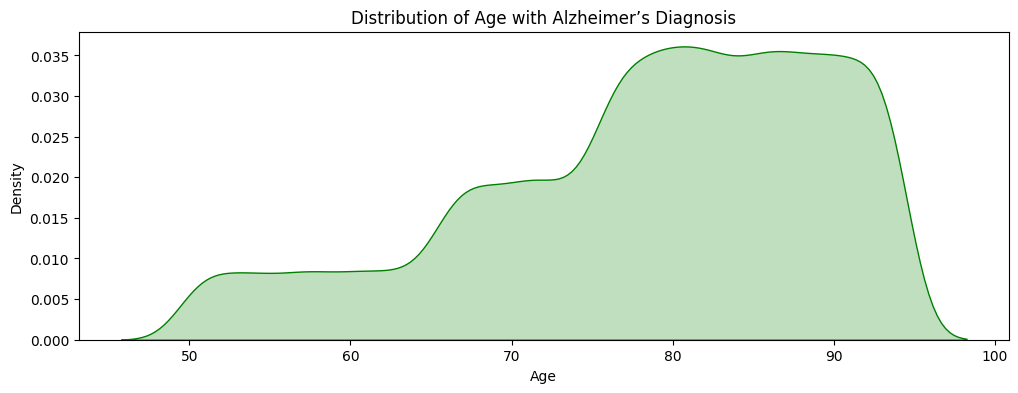

In [ ]:
plt.figure(figsize=(12, 4))

sns.kdeplot(df['Age'][df['Alzheimer'] == 'Yes'], color='green', fill=True)
plt.title('Distribution of Age with Alzheimer’s Diagnosis')

plt.show()

**Observation**: People in their late 70s - 90s are typically diagnosed with Alzheimers

### **Lifestyle Factors vs. Alzheimer's**

In [ ]:
fig = px.pie(values = df['Physical Activity Level'][df['Alzheimer'] == 'Yes'].value_counts(),
             names = df['Physical Activity Level'][df['Alzheimer'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Does Physical Activity Level affect Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent',
                             textfont=dict(color='white'))


fig.update_layout(width=600, height=600, showlegend=False)


fig.show()

In [ ]:
selected_columns = ['Physical Activity Level', 'Smoking Status', 'Sleep Quality',
                    'Alcohol Consumption', 'Social Engagement Level', 'Dietary Habits', 'Marital Status']

for column in selected_columns:
    print(df[df['Alzheimer'] == 'Yes'][column].value_counts(normalize=True) * 100)
    print("\n")


Physical Activity Level
High      33.627454
Low       33.269300
Medium    33.103246
Name: proportion, dtype: float64


Smoking Status
Never      33.520008
Current    33.396282
Former     33.083710
Name: proportion, dtype: float64


Sleep Quality
Good       33.796764
Average    33.269300
Poor       32.933937
Name: proportion, dtype: float64


Alcohol Consumption
Occasionally    33.536288
Regularly       33.233484
Never           33.230228
Name: proportion, dtype: float64


Social Engagement Level
Medium    33.526520
Low       33.402794
High      33.070687
Name: proportion, dtype: float64


Dietary Habits
Average      33.474425
Unhealthy    33.467913
Healthy      33.057663
Name: proportion, dtype: float64


Marital Status
Single     33.819555
Married    33.165109
Widowed    33.015336
Name: proportion, dtype: float64




Interestingly, there is a relatively even proportion for each lifestyle habit, implying that none of these lifestyle factors may have an effect on Alzheimer's.

Thus, "age" will be used as the core predictor of Alzheimer's for this section.

### **Logistic Regression for Age vs. Alzheimer's Diagnosis**

In [ ]:
age_column = "Age"
diagnosis_column = "Alzheimer"

# Encode Alzheimer's Diagnosis as binary (Yes = 1, No = 0)
label_encoder = LabelEncoder()
df[diagnosis_column] = label_encoder.fit_transform(df[diagnosis_column])

# Define predictor and response variable
X = df[[age_column]]  # Independent variable (predictor)
X = sm.add_constant(X)  # Adds an intercept term
y = df[diagnosis_column]  # Dependent variable (target)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.584428
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Alzheimer   No. Observations:                74283
Model:                          Logit   Df Residuals:                    74281
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.1381
Time:                        03:10:53   Log-Likelihood:                -43413.
converged:                       True   LL-Null:                       -50371.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7858      0.052   -111.384      0.000      -5.888      -5.684
Age            0.0745      0.

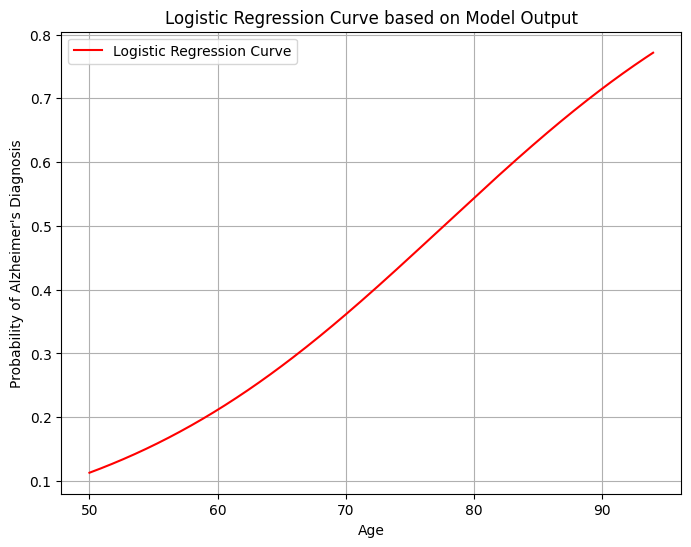

In [ ]:
# Extract coefficients from logistic regression results
intercept = -5.7858  # Constant term
slope = 0.0745  # Coefficient for Age

# Generate a range of ages (assuming relevant range)
age_range = np.linspace(50, 94, 300)

# Compute predicted probabilities using the logistic function
logit = intercept + slope * age_range
probabilities = 1 / (1 + np.exp(-logit))

# Plot the logistic regression curve
plt.figure(figsize=(8, 6))
plt.plot(age_range, probabilities, color='red', label="Logistic Regression Curve")

# Labels and legend
plt.xlabel("Age")
plt.ylabel("Probability of Alzheimer's Diagnosis")
plt.title("Logistic Regression Curve based on Model Output")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

**Observations:**
- It is firstly important to note that "age" here does not reflect the year when that individual was diagnosed with Alzheimer's, but rather the patient's current age.
- Age Coefficient: 0.0745. A positive coefficient means that as age increases, the likelihood of an Alzheimer's diagnosis increases.
The odds of being diagnosed increase by exp(0.0745) ≈ 1.077 for each additional year of age.
- Pseudo R-squared: 0.1381. Age alone accounts for ~13.81% of the variance in Alzheimer’s diagnosis.There are other factors influencing the diagnosis that are not captured by age alone.

**Conclusion:**
The logistic curve suggests that Alzheimer's is likely to be more prevalent in older individuals are more likely to have the disease.However, age alone does not determine Alzheimer's, further analysis incorporating additional data, such as medical conditions and genetic factors, will be done in the following sections

### **Question 2:**
#### **What is the relationship between coexisting conditions (diabetes, hypertension, and BMI) and Alzheimer’s prevalence? Do these factors change based on gender?**

**Hypotheses:**
- Hypothesis 1: People with diabetes, hypertension, and high BMI have a higher prevalence of Alzheimer's.
- Hypothesis 2: The relationship between these conditions and Alzheimer's varies by gender, with women having a higher prevalence of Alzheimer's compared to men.

---

In [ ]:
# Convert categorical variables to appropriate types
df["Alzheimer"] = df["Alzheimer"].map({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Hypertension'] = df['Hypertension'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].astype(str)

---

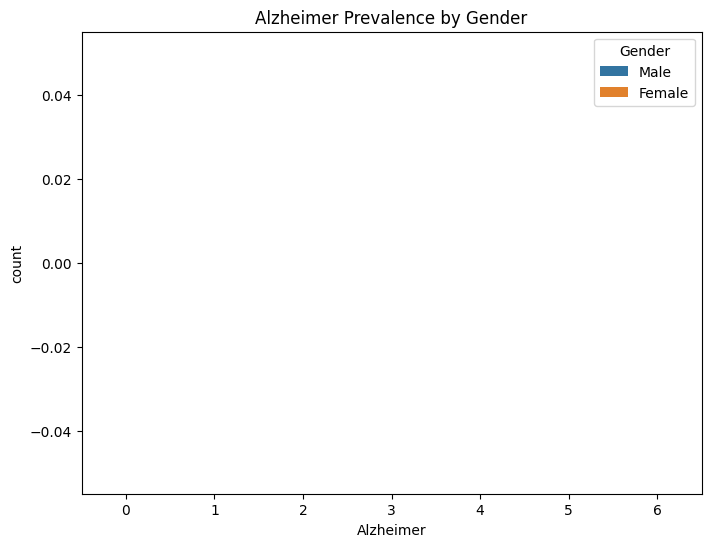

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

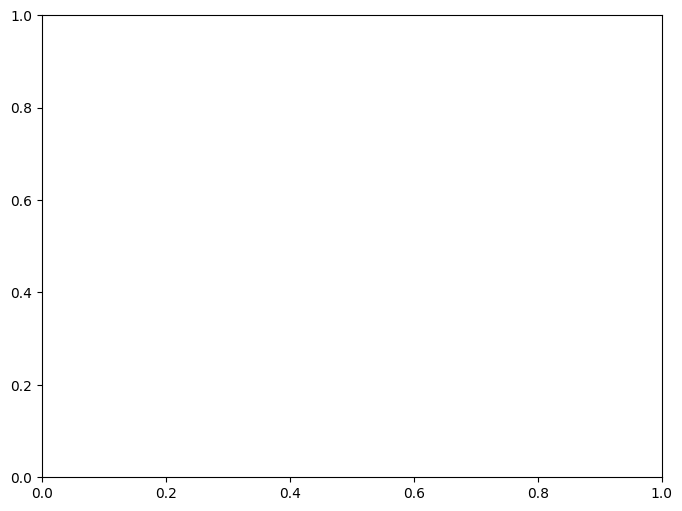

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(8,6))
sns.countplot(x='Alzheimer', hue='Gender', data=df)
plt.title('Alzheimer Prevalence by Gender')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Alzheimer', y='BMI', hue='Gender', data=df, boxprops=dict(edgecolor="k"))
plt.title('BMI Distribution by Alzheimer Status and Gender')
plt.show()

# Chi-square tests for categorical variables
def chi_square_test(df, col):
    contingency_table = pd.crosstab(df[col], df['Alzheimer'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

diabetes_p = chi_square_test(df, 'Diabetes')
hypertension_p = chi_square_test(df, 'Hypertension')
print(f"P-value for Diabetes & Alzheimer: {diabetes_p}")
print(f"P-value for Hypertension & Alzheimer: {hypertension_p}")

# T-test for BMI difference
alzheimers_bmi = df[df['Alzheimer'] == 1]['BMI']
non_alzheimers_bmi = df[df['Alzheimer'] == 0]['BMI']

t_stat, p_val = ttest_ind(alzheimers_bmi, non_alzheimers_bmi)
print(f"T-test for BMI and Alzheimer: t-statistic={t_stat}, p-value={p_val}")

# Logistic Regression Model
df_model = df[['Diabetes', 'Hypertension', 'BMI', 'Gender', 'Alzheimer']]
df_model = pd.get_dummies(df_model, columns=['Gender'], drop_first=True)

X = df_model.drop(columns=['Alzheimer'])
y = df_model['Alzheimer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Key Findings/Observations**

### **1. Alzheimer's Prevalence by Gender**
- The first plot displays the count of individuals diagnosed with Alzheimer's (1) and those without (0), categorized by gender.
- We can notice that the distribution between males and females appears to be relatively equal, which indicates that gender may not be a strong determining predictor of Alzheimer's prevalence.

### **2. BMI Distribution by Alzheimer's Status & Gender**
- This box plot compares BMI distributions amongst males and females with and without Alzheimer's.
- We can see that the median BMI and interquartile ranges are similar between the groups, which demonstrates that BMI may not be a strong predictor of Alzheimer's.
- In conclusion, among Alzheimer's patients, we can see that there isn't a significant gender-based difference in BMI, meaning BMI might not be a gender-dependent risk factor.

### **3. Confusion Matrix (Model Performance)**
- The last figure is the confusion matrix, which indicates that the predictive model used for Alzheimer's diagnosis is not effective.
- Even though there are 6,138 actual Alzheimer's cases, the matrix classified every case as **not having Alzheimer's (0)**.
- This may correlate with a class imbalance (more negative than positive cases), which could lead the model to always predict the majority class.
- There are a few possible improvements that could be made:
  - **Resampling techniques** (oversampling or undersampling)
  - **Adjusting model parameters**
  - **Using different machine learning algorithms** to improve classification accuracy.

---

## **Conclusion**
- The hypothesis that gender has an impact on Alzheimer's prevalence, with women having higher cases, is not strongly supported by the data. The prevalence seems to be evenly distributed.
- People with and without Alzheimer's don't seem to have major variances in their BMI, which indicates that it may not be a key risk factor by itself.
- The confusion matrix emphasizes serious drawbacks to the model and its ability to predict Alzheimer's cases, which indicates the need for model re-evaluation and adjustments. Examples include a more balanced dataset or exploring other feature selection methods.
- Further analysis integrating additional medical and lifestyle factors, along with a refined predictive model, may help us come to a more concrete conclusion and understand the risk factors contributing to Alzheimer's.

---

### Noticeable Problems with Data:
- Education Level: Are these values how many years someone has been educated for?
- Physical Activity: How is the creator of the dataset defining high, low, and other physical activity levels?
- Dietary Habits: How is the creator of the dataset defining healthy, average, and unhealthy habits?
- Social Engagement Level: How is the creator of the dataset defining low, medium, and high social engagement levels?
- Income Level: Are these income levels relative to the country that the person is from or is it a global scale? This is important because what is considered wealthy in one nation may be lower middle class in another.
- Stress Levels: How is the creator of the dataset defining low, medium, and high stress levels?
- Many of the variables in this dataset are not described well, making it difficult to draw insightful results from them.